In [1]:
BASE_PATH = './../datas'

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')

In [8]:
# !pip install pinecone
# !pip install langchain-openai
# !pip install langchain-pinecone

In [3]:
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key=PINECONE_API_KEY)

In [5]:
pc.delete_index('planterior')

In [6]:
pc.list_indexes()

[]

In [7]:
index_name = 'planterior'

if index_name not in pc.list_indexes().names():
  pc.create_index(
      name=index_name,
      dimension=1536,
      metric='cosine',
      spec=ServerlessSpec(
          cloud='aws',
          region='us-east-1'
      )
  )

In [8]:
from langchain_openai import OpenAIEmbeddings

persistent_directory = f'{BASE_PATH}/pinecone'

embedding_model = OpenAIEmbeddings(model='text-embedding-3-small')
index = pc.Index(index_name)

c:\Users\Playdata\AppData\Local\anaconda3\envs\project3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
fig_images =[
    os.path.join(BASE_PATH, f) for f in os.listdir(BASE_PATH) if f.lower().endswith('.jpg')
]

fig_images = sorted(fig_images)
fig_images

['./../datas\\img1.jpg',
 './../datas\\img10.jpg',
 './../datas\\img11.jpg',
 './../datas\\img12.jpg',
 './../datas\\img13.jpg',
 './../datas\\img14.jpg',
 './../datas\\img15.jpg',
 './../datas\\img16.jpg',
 './../datas\\img17.jpg',
 './../datas\\img18.jpg',
 './../datas\\img19.jpg',
 './../datas\\img2.jpg',
 './../datas\\img20.jpg',
 './../datas\\img21.jpg',
 './../datas\\img22.jpg',
 './../datas\\img23.jpg',
 './../datas\\img24.jpg',
 './../datas\\img25.jpg',
 './../datas\\img26.jpg',
 './../datas\\img27.jpg',
 './../datas\\img28.jpg',
 './../datas\\img29.jpg',
 './../datas\\img3.jpg',
 './../datas\\img30.jpg',
 './../datas\\img31.jpg',
 './../datas\\img32.jpg',
 './../datas\\img33.jpg',
 './../datas\\img34.jpg',
 './../datas\\img35.jpg',
 './../datas\\img36.jpg',
 './../datas\\img37.jpg',
 './../datas\\img38.jpg',
 './../datas\\img39.jpg',
 './../datas\\img4.jpg',
 './../datas\\img40.jpg',
 './../datas\\img5.jpg',
 './../datas\\img6.jpg',
 './../datas\\img7.jpg',
 './../datas\\img8.

In [ ]:
import base64
from openai import OpenAI

def image_to_base64(image_path):
  with open(image_path, 'rb') as f:
    return base64.b64encode(f.read()).decode('utf-8')

def summarize_image(image_path):
  client = OpenAI()
  system_message = "해당 이미지의 인테리어를 한국어로 자세히 설명하라."
  
  with open(image_path, 'rb') as f:
    response = client.chat.completions.create(
        model='gpt-4o',
        messages=[
            {'role': 'system',
             'content': system_message},
            {'role': 'user',
             'content': [{'type': 'image_url', 'image_url': {'url': f'data:image/jpeg;base64, {image_to_base64(image_path)}'}}]
            }
        ]
    )
    return response.choices[0].message.content

print(summarize_image('./../datas/img1.jpg'))


이 욕실 인테리어는 밝고 세련된 느낌을 주고 있습니다. 화장대는 부드러운 파란색으로 칠해져 있으며, 깔끔한 흰색 대리석 또는 석재 상판이 매치되어 있습니다. 세면대 위쪽에는 긴 직사각형 모양의 거울이 설치되어 있고, 거울 양옆으로 LED 조명이 부착되어 있어 현대적인 분위기를 강조합니다. 

수도꼭지는 금속성 마감으로, 세면대의 깔끔한 디자인과 잘 어울립니다. 화장대 위에는 여러 개의 흰색 꽃병이 장식되어 있으며, 그 안에는 생화나 인조 꽃들이 꽂혀 있어 공간에 생기를 더합니다. 주변 벽은 중립적인 색조로 되어 있어 전체적인 색상 조화가 잘 이루어지고 있습니다. 

천장에는 회색의 천장 선풍기가 설치되어 있어 기능성과 함께 스타일리시한 요소를 더하고 있습니다. 전체적으로 밝고 깔끔한 느낌을 주면서도 세부적인 부분에서 세련된 디자인을 보여주는 욕실입니다.


In [ ]:
from tqdm import tqdm

index = pc.Index(index_name)

for i, fig_img_path in enumerate(tqdm(fig_images)):
  summary = summarize_image(fig_img_path)
  b64 = image_to_base64(fig_img_path)
  embedding = embedding_model.embed_query(b64)
  index.upsert(
      vectors=[{
          'id': str(i),
          'values': embedding,
          'metadata': {'img_path': fig_img_path, 'text': summary}
      }]
  )


100%|██████████| 40/40 [06:00<00:00,  9.01s/it]


Top result text:
 이 욕실의 인테리어는 현대적이고 깔끔한 느낌을 줍니다. 화이트 톤의 타일 벽이 공간을 밝고 넓어 보이게 합니다. 나무 재질의 캐비닛이 따뜻한 분위기를 더하고, 위치한 검은색 손잡이가 세련된 느낌을 줍니다.

싱크대 위에는 두 개의 사각 형태 거울이 각각 배치되어 있으며, 금색 수도꼭지가 고급스러움을 더해줍니다. 조명은 클래식한 디자인으로, 흰색 전구 커버가 일체감을 줍니다.

작은 화병에 담긴 식물들이 자연스러운 포인트를 추가하며, 블랙 톤의 작은 장식품들이 전체적인 디자인을 완성합니다. 전반적으로 우아하면서도 아늑한 느낌의 인테리어입니다.


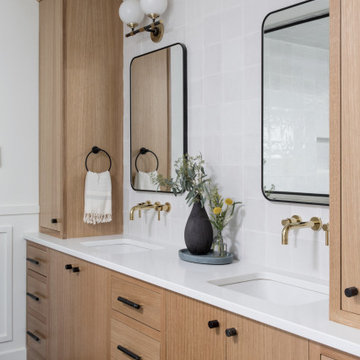

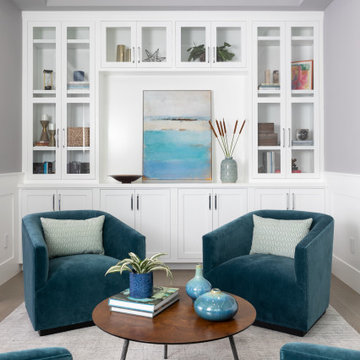

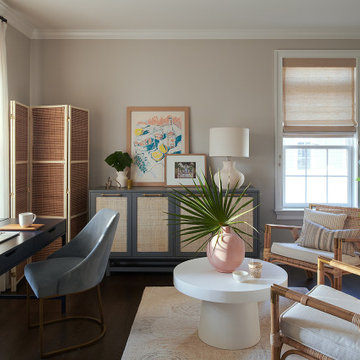

In [ ]:
from PIL import Image
from langchain_pinecone import PineconeVectorStore

def show_image_from_path(path):
    img = Image.open(path)
    display(img)

def search_top3(query, k=3):
    vector_store = PineconeVectorStore(
        index_name=index_name,
        embedding=embedding_model
    )
    docs = vector_store.similarity_search(query, k=k)

    if not docs:
        print("검색 결과 없음")
        return
    img_path = []
    img_path.append(docs[0].metadata["img_path"])
    img_path.append(docs[1].metadata["img_path"])
    img_path.append(docs[2].metadata["img_path"])

    return docs[0].page_content, img_path